In [1]:
# to ignore TF warning message (1)
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# to ignore TF warning message (2)
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR) 

In [2]:
from keras.datasets import reuters

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [4]:
import numpy as np

In [5]:
def vectorize_sequences(sequences, dimension=10000):
    # e.g. [1, 3, 4] -> [1 0 1 1 0 ... 0]
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [6]:
x_train, x_test = vectorize_sequences(train_data), vectorize_sequences(test_data)

In [7]:
from keras.utils.np_utils import to_categorical

In [8]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [10]:
def get_loss_acc(history_dic):
    loss, val_loss = history_dic.history['loss'], history_dic.history['val_loss']
    acc, val_acc = history_dic.history['accuracy'], history_dic.history['val_accuracy']
    return loss, val_loss, acc, val_acc

In [11]:
import matplotlib.pyplot as plt

def loss_acc_graph(epochs, loss, val_loss, acc, val_acc):
    plt.clf() 
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'o--', label='Training Loss')
    plt.plot(epochs, val_loss, 'o-', label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'o--', label='Training Acc.')
    plt.plot(epochs, val_acc, 'o-', label='Validation Acc.')
    plt.title('Acc.')
    plt.xlabel('Epochs')
    plt.ylabel('Acc.')
    plt.legend()

    plt.show()
    
    print('max(train_acc)', max(acc), 'max(val_acc)', max(val_acc))

In [12]:
x_val, partial_x_train = x_train[:1000], x_train[1000:]
y_val, partial_y_train = one_hot_train_labels[:1000], one_hot_train_labels[1000:]

In [13]:
from keras import models, layers

## textbook - example

In [14]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', 
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose=0)

<Figure size 640x480 with 0 Axes>

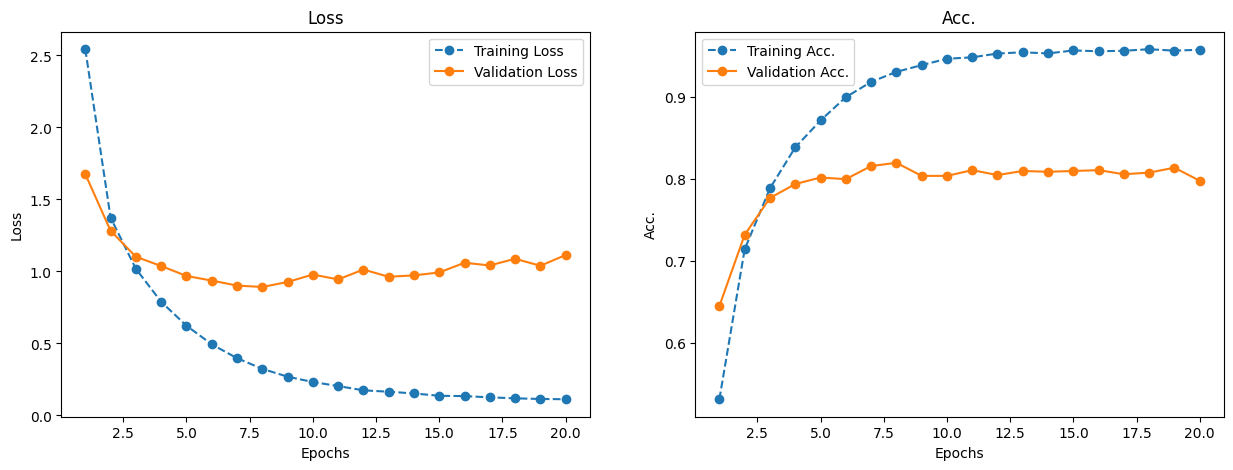

max(train_acc) 0.9587822556495667 max(val_acc) 0.8199999928474426
71/71 [==============================] - 0s 2ms/step - loss: 1.2746 - accuracy: 0.7774

 [1.27463960647583, 0.7773820161819458]


In [15]:
loss, val_loss, acc, val_acc = get_loss_acc(history)
epochs = np.arange(1, len(loss) + 1)
loss_acc_graph(epochs, loss, val_loss, acc, val_acc)

result = model.evaluate(x_test, one_hot_test_labels)
print('\n', result)

# change 1: 64 -> 32 (hidden units / each layer)

<Figure size 640x480 with 0 Axes>

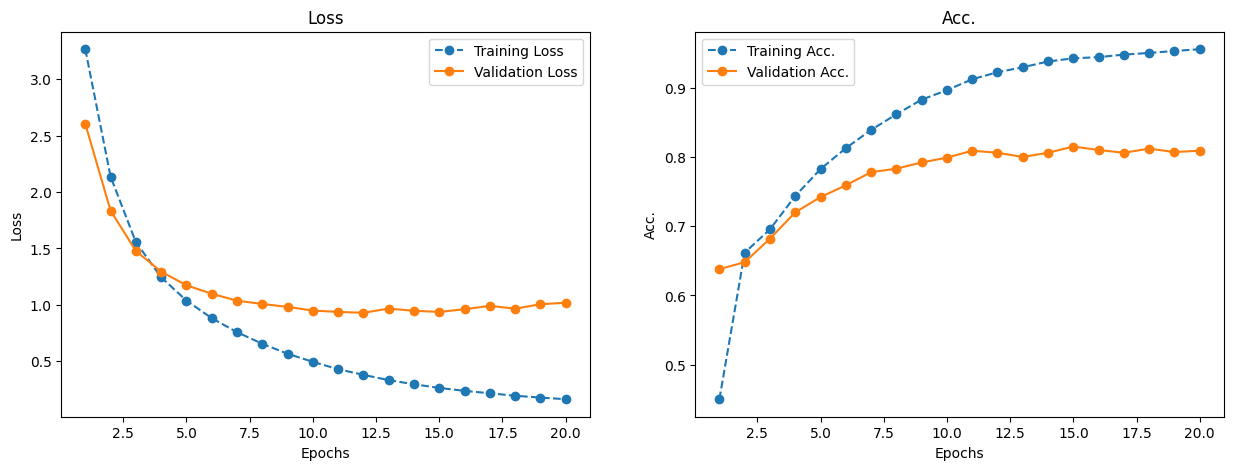

max(train_acc) 0.9555249214172363 max(val_acc) 0.8149999976158142
71/71 [==============================] - 0s 2ms/step - loss: 1.1161 - accuracy: 0.7854

 [1.1160855293273926, 0.7853962779045105]


In [16]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', 
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose=0)

loss, val_loss, acc, val_acc = get_loss_acc(history)
epochs = np.arange(1, len(loss) + 1)
loss_acc_graph(epochs, loss, val_loss, acc, val_acc)

result = model.evaluate(x_test, one_hot_test_labels)
print('\n', result)

# change 2: 64 -> 128 (hidden units / each layer)

<Figure size 640x480 with 0 Axes>

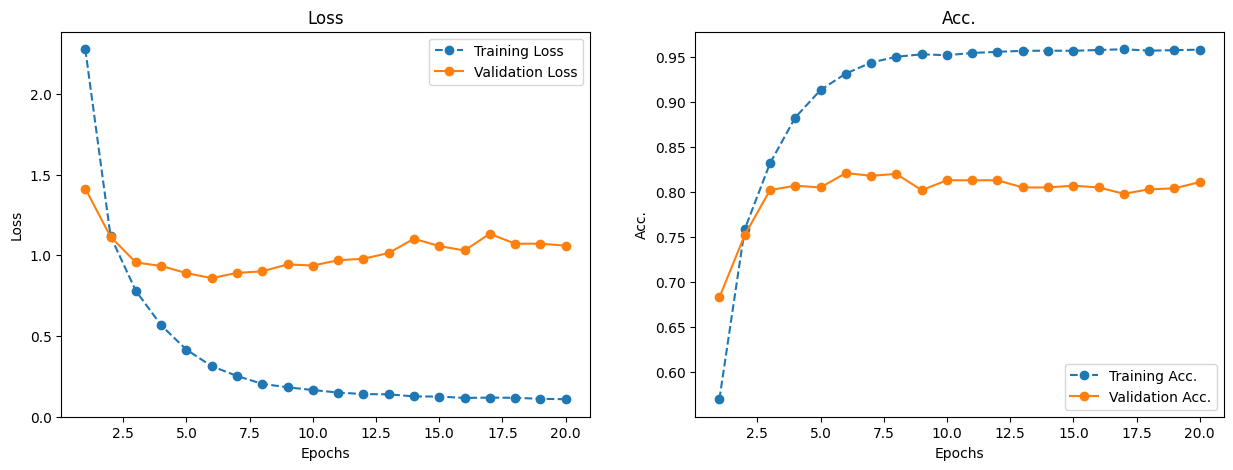

max(train_acc) 0.958406388759613 max(val_acc) 0.8209999799728394
71/71 [==============================] - 0s 3ms/step - loss: 1.2341 - accuracy: 0.7930

 [1.2341269254684448, 0.792965292930603]


In [17]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', 
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose=0)

loss, val_loss, acc, val_acc = get_loss_acc(history)
epochs = np.arange(1, len(loss) + 1)
loss_acc_graph(epochs, loss, val_loss, acc, val_acc)

result = model.evaluate(x_test, one_hot_test_labels)
print('\n', result)

# change 3: 4 hidden layers

<Figure size 640x480 with 0 Axes>

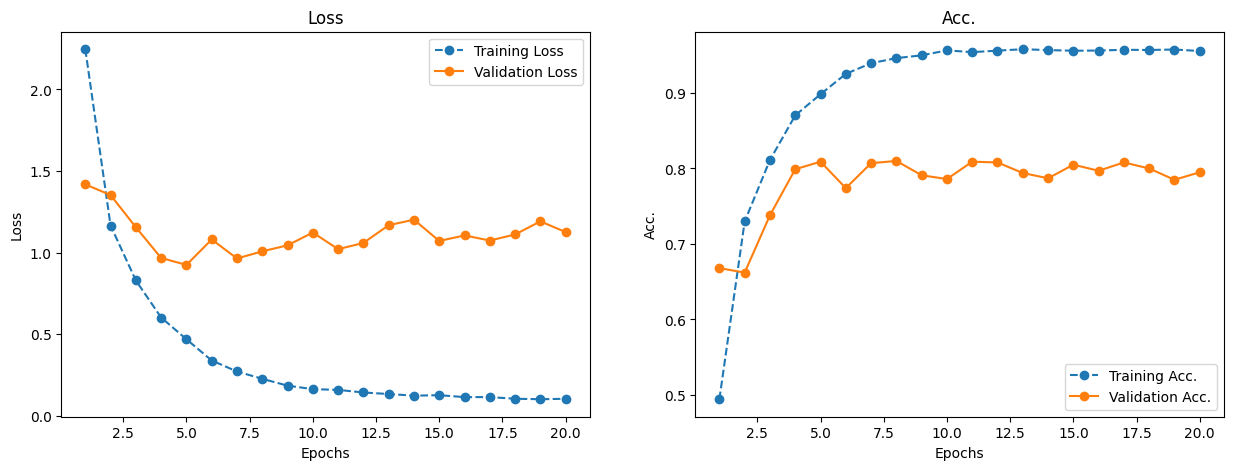

max(train_acc) 0.9580305814743042 max(val_acc) 0.8100000023841858
71/71 [==============================] - 0s 3ms/step - loss: 1.3122 - accuracy: 0.7890

 [1.3122029304504395, 0.7889581322669983]


In [18]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', 
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose=0)

loss, val_loss, acc, val_acc = get_loss_acc(history)
epochs = np.arange(1, len(loss) + 1)
loss_acc_graph(epochs, loss, val_loss, acc, val_acc)

result = model.evaluate(x_test, one_hot_test_labels)
print('\n', result)

# change 4: 4 hidden layers + SGD

<Figure size 640x480 with 0 Axes>

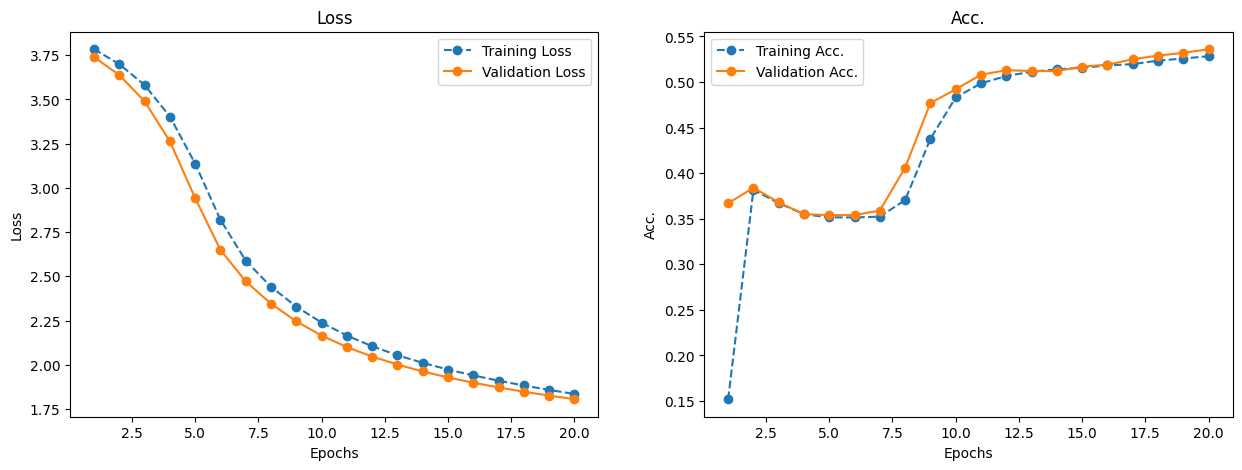

max(train_acc) 0.5283136963844299 max(val_acc) 0.5360000133514404
71/71 [==============================] - 0s 3ms/step - loss: 1.8446 - accuracy: 0.5329

 [1.8446193933486938, 0.5329474806785583]


In [19]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='sgd', 
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose=0)

loss, val_loss, acc, val_acc = get_loss_acc(history)
epochs = np.arange(1, len(loss) + 1)
loss_acc_graph(epochs, loss, val_loss, acc, val_acc)

result = model.evaluate(x_test, one_hot_test_labels)
print('\n', result)

# change 5: 4 hidden layers + adam

<Figure size 640x480 with 0 Axes>

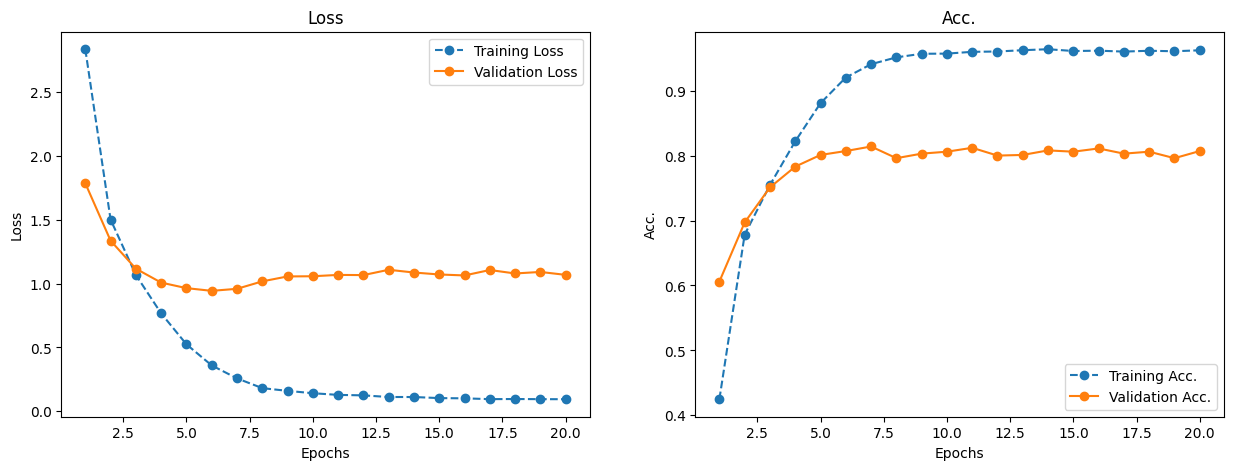

max(train_acc) 0.9637935161590576 max(val_acc) 0.8140000104904175
71/71 [==============================] - 0s 3ms/step - loss: 1.2067 - accuracy: 0.7965

 [1.2066980600357056, 0.7965271472930908]


In [20]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='adam', 
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose=0)

loss, val_loss, acc, val_acc = get_loss_acc(history)
epochs = np.arange(1, len(loss) + 1)
loss_acc_graph(epochs, loss, val_loss, acc, val_acc)

result = model.evaluate(x_test, one_hot_test_labels)
print('\n', result)

# change 6: 4 hidden layers, 128 -> 512 (hidden units / per each layer)

<Figure size 640x480 with 0 Axes>

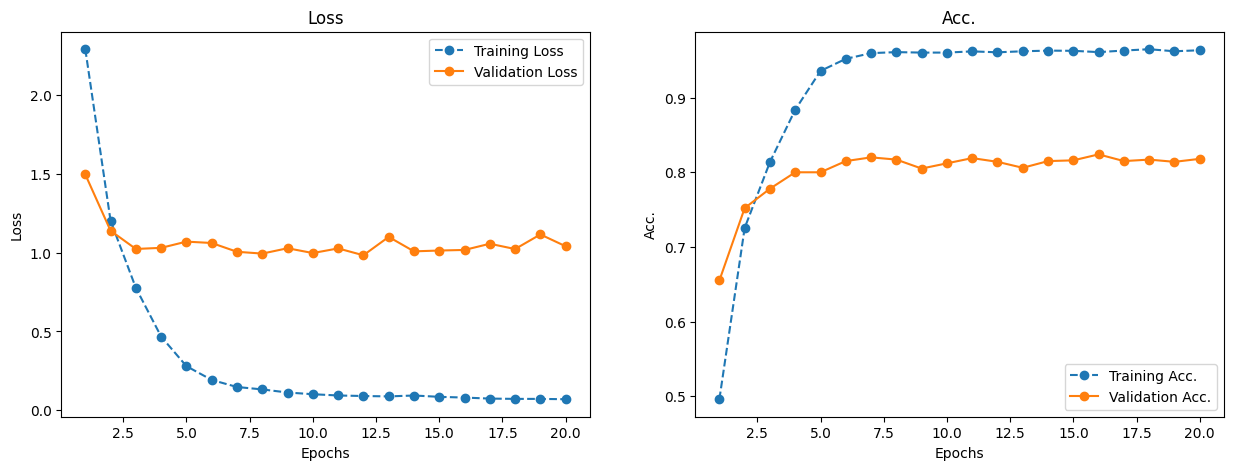

max(train_acc) 0.9649210572242737 max(val_acc) 0.8240000009536743
71/71 [==============================] - 1s 7ms/step - loss: 1.2055 - accuracy: 0.8005

 [1.2055060863494873, 0.8005343079566956]


In [21]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='adam', 
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose=0)

loss, val_loss, acc, val_acc = get_loss_acc(history)
epochs = np.arange(1, len(loss) + 1)
loss_acc_graph(epochs, loss, val_loss, acc, val_acc)

result = model.evaluate(x_test, one_hot_test_labels)
print('\n', result)

# change 7: 4 hidden layers + adam + loss(mse)

<Figure size 640x480 with 0 Axes>

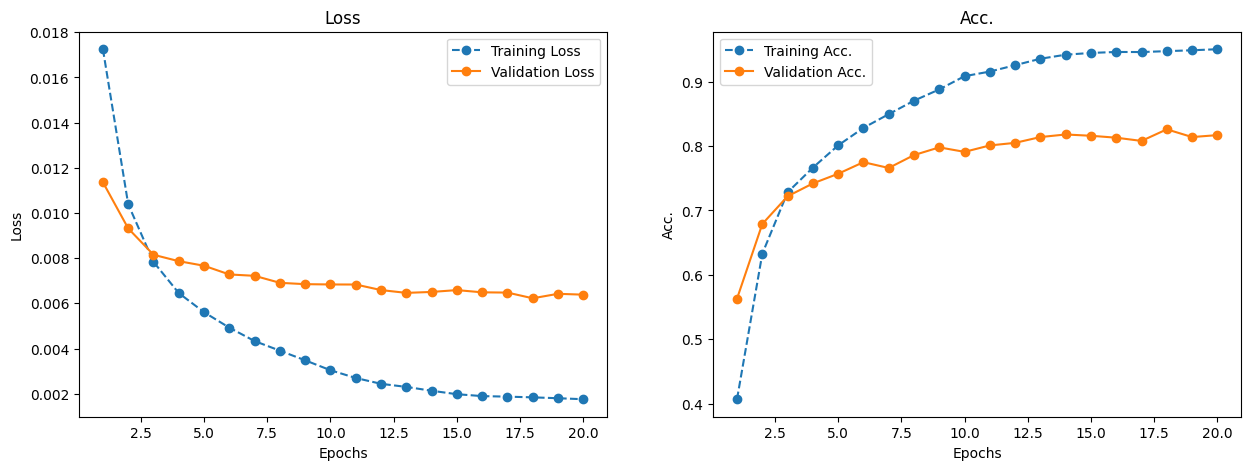

max(train_acc) 0.9503883719444275 max(val_acc) 0.8259999752044678
71/71 [==============================] - 1s 7ms/step - loss: 0.0072 - accuracy: 0.7916

 [0.007178609725087881, 0.7916295528411865]


In [22]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='adam', 
             loss='mse',
             metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose=0)

loss, val_loss, acc, val_acc = get_loss_acc(history)
epochs = np.arange(1, len(loss) + 1)
loss_acc_graph(epochs, loss, val_loss, acc, val_acc)

result = model.evaluate(x_test, one_hot_test_labels)
print('\n', result)

# change 8: 4 hidden layers + adam + loss(focal loss)

In [23]:
from keras import backend as K

def categorical_focal_loss(alpha, gamma=2.):
    """
    Usage:
     model.compile(loss=[categorical_focal_loss(alpha=[[.25, .25, .25]], gamma=2)], metrics=["accuracy"], optimizer=adam)
    """

    alpha = np.array(alpha, dtype=np.float32)

    def categorical_focal_loss_fixed(y_true, y_pred):
        # Clip the prediction value to prevent NaN's and Inf's
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)

        # Calculate Cross Entropy
        cross_entropy = -y_true * K.log(y_pred)

        # Calculate Focal Loss
        loss = alpha * K.pow(1 - y_pred, gamma) * cross_entropy

        # Compute mean loss in mini_batch
        return K.mean(K.sum(loss, axis=-1))

    return categorical_focal_loss_fixed

<Figure size 640x480 with 0 Axes>

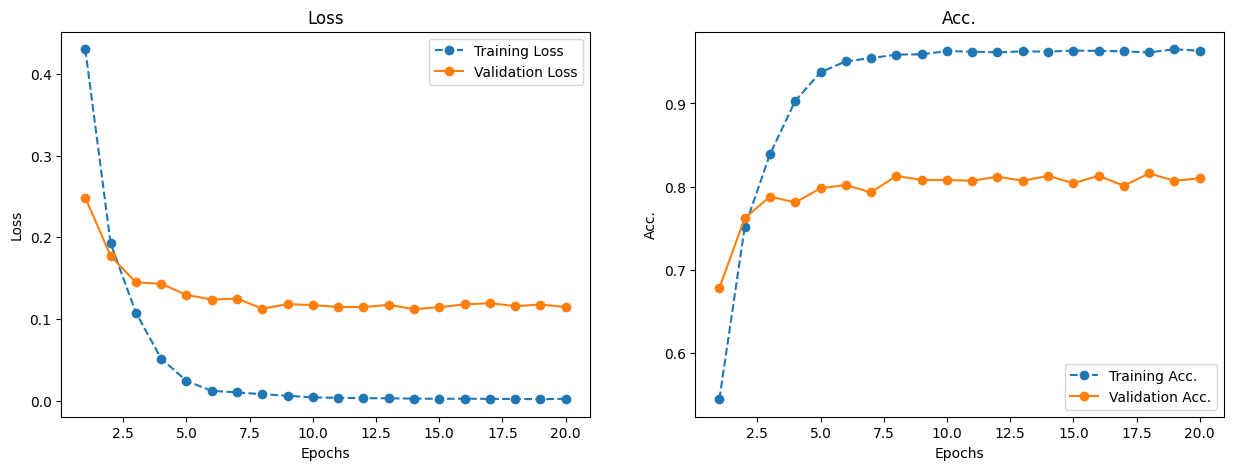

max(train_acc) 0.9652969241142273 max(val_acc) 0.8159999847412109
71/71 [==============================] - 1s 7ms/step - loss: 0.1299 - accuracy: 0.8014

 [0.12992683053016663, 0.8014247417449951]


In [24]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='adam', 
             loss=[categorical_focal_loss(alpha=.25, gamma=5)],
             metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose=0)

loss, val_loss, acc, val_acc = get_loss_acc(history)
epochs = np.arange(1, len(loss) + 1)
loss_acc_graph(epochs, loss, val_loss, acc, val_acc)

result = model.evaluate(x_test, one_hot_test_labels)
print('\n', result)

<Figure size 640x480 with 0 Axes>

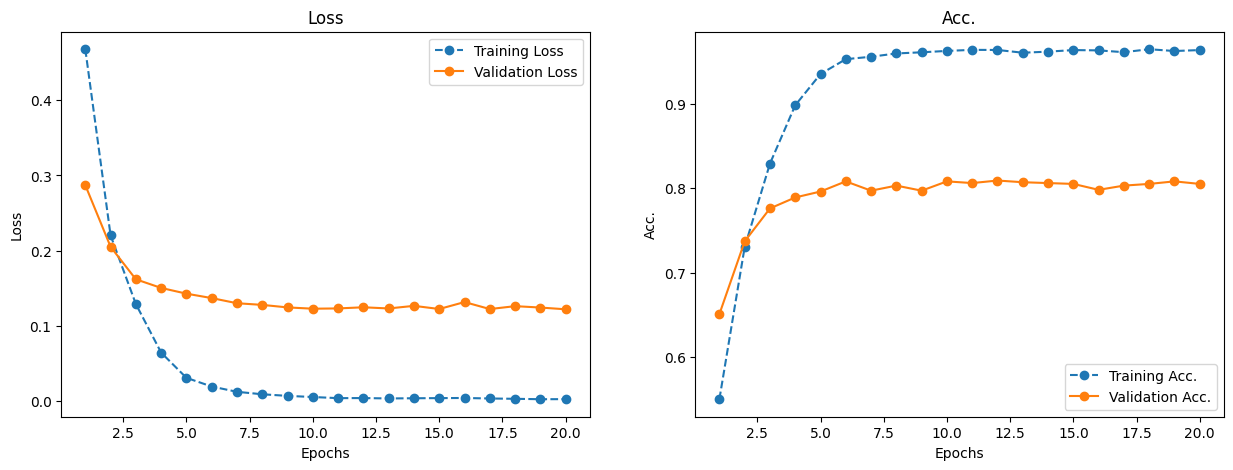

max(train_acc) 0.9642946720123291 max(val_acc) 0.8090000152587891
71/71 [==============================] - 0s 7ms/step - loss: 0.1485 - accuracy: 0.7952

 [0.14850376546382904, 0.7951914668083191]


In [25]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='adam', 
             loss=[categorical_focal_loss(alpha=.25, gamma=4)],
             metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose=0)

loss, val_loss, acc, val_acc = get_loss_acc(history)
epochs = np.arange(1, len(loss) + 1)
loss_acc_graph(epochs, loss, val_loss, acc, val_acc)

result = model.evaluate(x_test, one_hot_test_labels)
print('\n', result)

<Figure size 640x480 with 0 Axes>

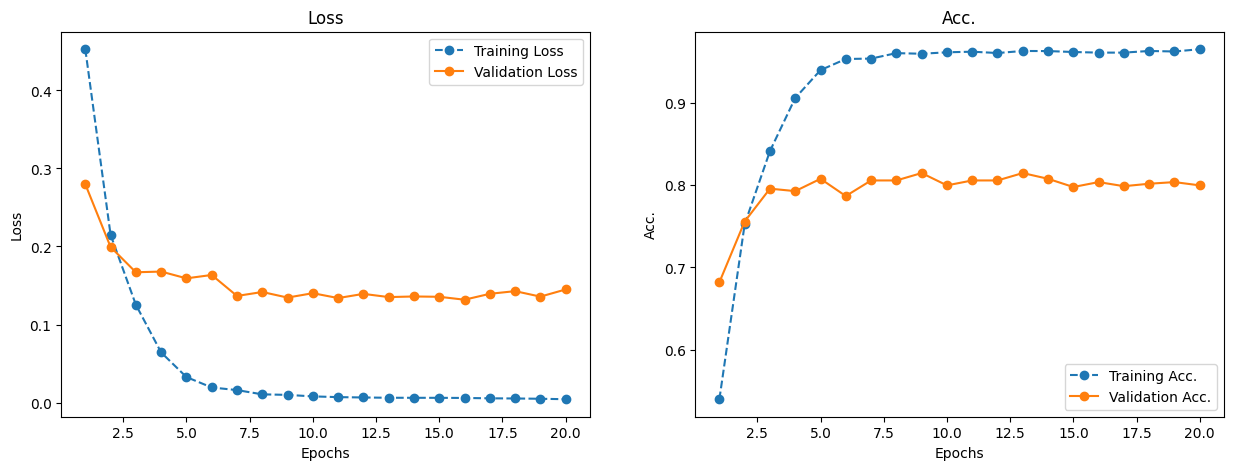

max(train_acc) 0.965798020362854 max(val_acc) 0.8149999976158142
71/71 [==============================] - 0s 6ms/step - loss: 0.1652 - accuracy: 0.7898

 [0.16517609357833862, 0.7898486256599426]


In [26]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='adam', 
             loss=[categorical_focal_loss(alpha=.25, gamma=3)],
             metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose=0)

loss, val_loss, acc, val_acc = get_loss_acc(history)
epochs = np.arange(1, len(loss) + 1)
loss_acc_graph(epochs, loss, val_loss, acc, val_acc)

result = model.evaluate(x_test, one_hot_test_labels)
print('\n', result)

<Figure size 640x480 with 0 Axes>

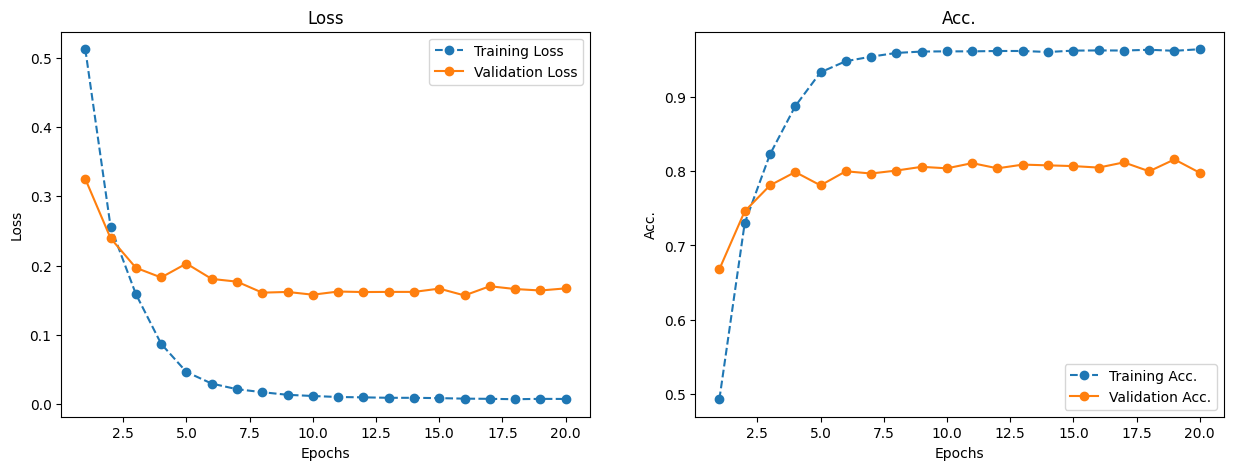

max(train_acc) 0.9645452499389648 max(val_acc) 0.8159999847412109
71/71 [==============================] - 0s 7ms/step - loss: 0.1852 - accuracy: 0.7903

 [0.18524861335754395, 0.7902938723564148]


In [27]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='adam', 
             loss=[categorical_focal_loss(alpha=.25, gamma=2)],
             metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose=0)

loss, val_loss, acc, val_acc = get_loss_acc(history)
epochs = np.arange(1, len(loss) + 1)
loss_acc_graph(epochs, loss, val_loss, acc, val_acc)

result = model.evaluate(x_test, one_hot_test_labels)
print('\n', result)

# ⭐ BEST TEST ACC. ⭐

<Figure size 640x480 with 0 Axes>

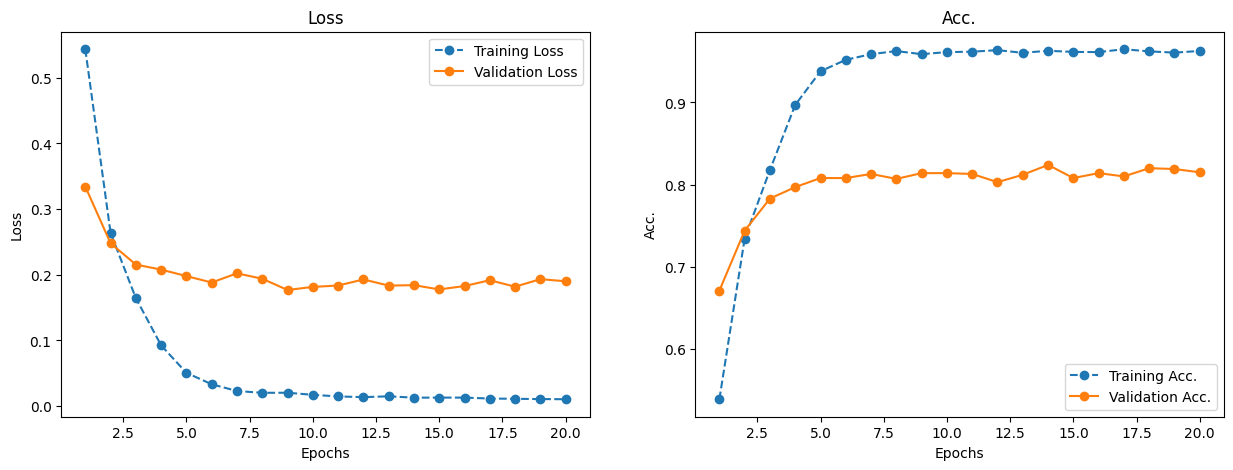

max(train_acc) 0.9647957682609558 max(val_acc) 0.8240000009536743
71/71 [==============================] - 1s 7ms/step - loss: 0.2217 - accuracy: 0.7965

 [0.221725732088089, 0.7965271472930908]


In [28]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='adam', 
             loss=[categorical_focal_loss(alpha=.25, gamma=1)],
             metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose=0)

loss, val_loss, acc, val_acc = get_loss_acc(history)
epochs = np.arange(1, len(loss) + 1)
loss_acc_graph(epochs, loss, val_loss, acc, val_acc)

result = model.evaluate(x_test, one_hot_test_labels)
print('\n', result)

# (Last) textbook example focal loss

<Figure size 640x480 with 0 Axes>

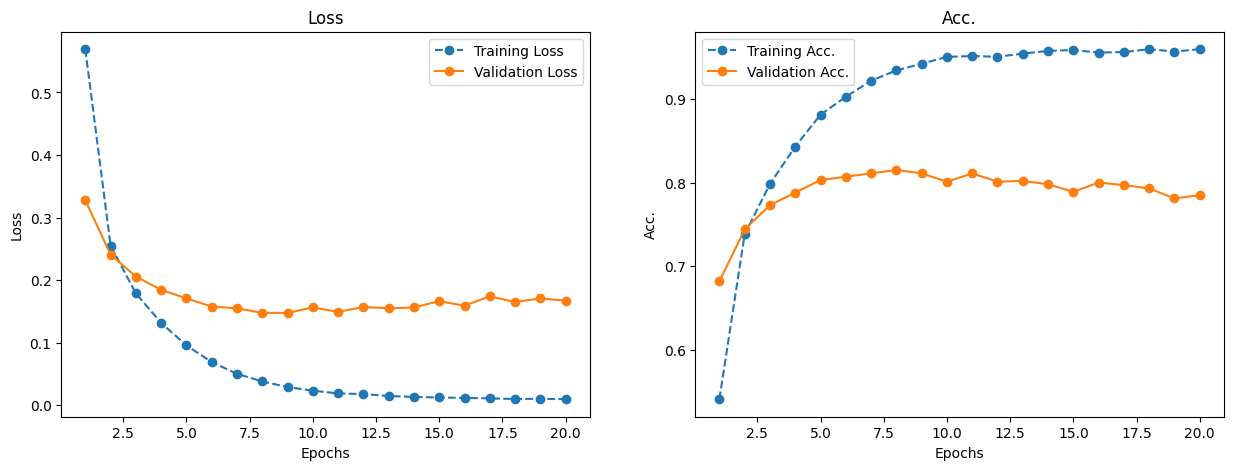

max(train_acc) 0.9592834115028381 max(val_acc) 0.8149999976158142
71/71 [==============================] - 0s 3ms/step - loss: 0.1878 - accuracy: 0.7769

 [0.18776604533195496, 0.7769367694854736]


In [29]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', 
             loss=[categorical_focal_loss(alpha=.25, gamma=3)],
             metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose=0)

loss, val_loss, acc, val_acc = get_loss_acc(history)
epochs = np.arange(1, len(loss) + 1)
loss_acc_graph(epochs, loss, val_loss, acc, val_acc)

result = model.evaluate(x_test, one_hot_test_labels)
print('\n', result)